In [6]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [7]:
# Get data
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [14]:
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
307,308,50,RM,NaN,7920,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2008,WD,Normal,89500
920,921,60,RL,70.0,8462,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,201000
1297,1298,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,New,Partial,140000
750,751,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,96500
1108,1109,60,RL,NaN,8063,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,181000
736,737,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,93500
70,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
842,843,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,174900
786,787,50,RM,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,1200,6,2010,WD,Normal,139000


In [15]:
# drop alley column
# drop fence column
# drop garage yr blt??? ask elliot abt zeros


In [16]:
# Drop Id column
train.drop(["Id","Street","PoolQC","Utilities","MiscFeature", "Alley"], axis = 1, inplace = True)
test.drop(["Id","Street","PoolQC","Utilities","MiscFeature", "Alley"],axis = 1, inplace = True)

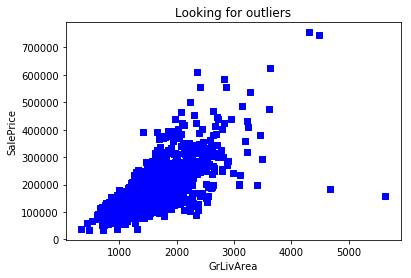

In [17]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train[train.GrLivArea < 4000]

In [18]:
train.shape

(1456, 75)

In [19]:
list(train.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'Screen

In [8]:
train1 = train.copy()

In [21]:
train1['MoSold'].value_counts()

6     253
7     233
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      56
2      52
Name: MoSold, dtype: int64

In [22]:
### Attempt at feature engineering
# categorize months into different seasons based on number of houses sold... 
arr = []
for i in range(0,1456):
    if train['MoSold'].iloc[i] in [5, 6, 7]: 
        arr.append('HotSzn')
    elif train['MoSold'].iloc[i] in [3, 4, 8]:
        arr.append('MediumSzn')
    elif train['MoSold'].iloc[i] in [9, 10, 11]: 
        arr.append('MildSzn')
    else:
        arr.append('ColdSzn')
train['season'] = arr

In [23]:
train['Remodeled'] = (train['YearBuilt']==train['YearRemodAdd']).astype(int)
train['NewHouse'] = (train['YearBuilt']==train['YrSold']).astype(int)

In [24]:
# train.loc[train.Alley.isnull(), 'Alley'] = 'None'

In [25]:
train['MasVnrType'].fillna(value = 'None', inplace = True)
train['MasVnrArea'].replace(np.nan, 0, inplace = True)

In [26]:
train['Fence'].fillna('None', inplace = True)

In [27]:
train['FireplaceQu'].fillna('None', inplace = True)

In [28]:
###### Garage columns
### Seems like there are 81 houses with no garage...

train['GarageType'].fillna('None', inplace = True)
train['GarageCond'].fillna('None', inplace = True)
train['GarageFinish'].fillna('None', inplace = True)
train['GarageQual'].fillna('None', inplace = True)

# Use ZERO for this column
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace = True)

In [29]:
### basement crap
train['BsmtCond'].fillna('None', inplace = True)
train['BsmtQual'].fillna('None', inplace = True)
train['BsmtExposure'].fillna('None', inplace = True)
train['BsmtFinType2'].fillna('None', inplace = True)
train['BsmtFinType1'].fillna('None', inplace = True)

In [30]:
## use mode for the 1 missing electrical value 
train['Electrical'].fillna((train['Electrical'].value_counts().index[0]), inplace = True)

In [31]:
# use median for lot frontage
train['LotFrontage'].fillna((train['LotFrontage'].median()), inplace=True)

In [32]:
train.isnull().sum().sort_values(ascending=False)[:34]

NewHouse        0
BsmtExposure    0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
Exterior1st     0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
Exterior2nd     0
RoofMatl        0
Remodeled       0
Neighborhood    0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Condition1      0
RoofStyle       0
Condition2      0
BldgType        0
HouseStyle      0
dtype: int64

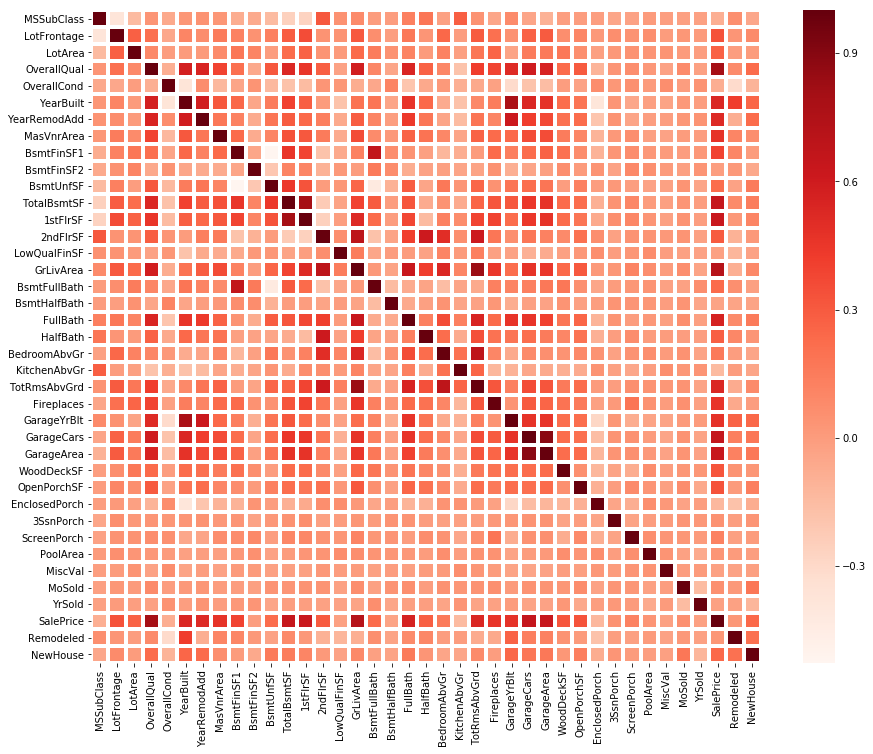

In [33]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
DWade = sns.heatmap(corrmat, linecolor = 'white', cmap = 'Reds', linewidths = 3)

In [34]:
# Encode some categorical features as ordered numbers when there is information in the order
# train = train.replace({
#                         "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
#                         "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}

#                        })
                     

# #Changing some of the columns to ordinal values

## Basement cols
# Basement Condition
mapping4 = {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
train.replace({'BsmtCond': mapping4}, inplace = True)
# Basement Exposure
mapping5 = {"No" : 0,'None':0, "Mn" : 1, "Av": 2, "Gd" : 3}
train.replace({'BsmtExposure': mapping5}, inplace = True)
# Basement Qual
mapping6 = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}
train.replace({'BsmtQual':mapping6}, inplace = True)
# Basement Fin type 1
mapping7 = {"None": 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
train.replace({'BsmtFinType1':mapping7}, inplace = True)
# Basement Fin type 2
mapping8 = {"None": 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
train.replace({'BsmtFinType2':mapping8}, inplace = True)

# Heating QC (quality)
mapping9 = {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
train.replace({'HeatingQC':mapping9},inplace = True)

## Garage cols
# garage cond
mapping10 = {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
train.replace({'GarageCond': mapping10}, inplace = True)
# garage qual
mapping11 = {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
train.replace({'GarageQual': mapping11}, inplace = True)

### home functionality
mapping12 = {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8}
train.replace({'Functional': mapping12}, inplace = True)

## exterior
# exterior condition
mapping13 = {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}
train.replace({'ExterCond': mapping13}, inplace = True)
# exterior quality
mapping14 = {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}
train.replace({'ExterQual':mapping14}, inplace = True)

# kitchen quality
mapping15 = {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
train.replace({"KitchenQual": mapping15}, inplace = True)

# fireplace quality
mapping16 = {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5}
train.replace({'FireplaceQu': mapping16}, inplace = True)

In [35]:
train['FireplaceQu'].value_counts()

0    690
4    378
3    312
2     33
5     23
1     20
Name: FireplaceQu, dtype: int64

In [36]:
# Feature Engineering
# add ordinal basement columns
train['CombinedBsmt'] = train['BsmtQual'] + train['BsmtCond'] + train['BsmtExposure'] + train['BsmtFinType1']+train['BsmtFinType2']


In [37]:
train['ExterQual'].sample(5)

116     3
130     3
244     4
1059    3
420     3
Name: ExterQual, dtype: int64

In [38]:
train["Foundation"].value_counts()

PConc     643
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [39]:
train.groupby('Foundation', as_index=False)['YearBuilt'].median()

,Foundation,YearBuilt
0,BrkTil,1922.0
1,CBlock,1963.5
2,PConc,2002.0
3,Slab,1955.0
4,Stone,1905.0
5,Wood,1990.0


In [40]:
train.groupby('Foundation', as_index=False)['SalePrice'].mean()

,Foundation,SalePrice
0,BrkTil,132291.075342
1,CBlock,149805.714511
2,PConc,223762.590980
3,Slab,107365.625000
4,Stone,165959.166667
5,Wood,185666.666667


In [41]:
train['TotalBaths'] = train['FullBath']+train['BsmtFullBath']+(.5*train['HalfBath'])+(.5*train['BsmtHalfBath'])
train['TotalBaths2'] = (train['TotalBaths']**2)

In [42]:
train['FullBathTotal'] = train['FullBath'] + train['BsmtFullBath']
train['FullBathTotal'].value_counts()

2    750
1    371
3    318
4     15
6      1
0      1
Name: FullBathTotal, dtype: int64

In [43]:
train['HouseAge'] = train['YrSold']-train['YearBuilt']

In [44]:
train['RemodalAge'] = train['YrSold']-train['YearRemodAdd']

In [45]:
np.arange(7,12)

array([ 7,  8,  9, 10, 11])

In [46]:
train['HouseAge'].value_counts().sort_index(ascending=True)

0       62
1      100
2       39
3       36
4       41
5       30
6       30
7       24
8       25
9       23
10      22
11      21
12      16
13      14
14      14
15      20
16      12
17      11
18       8
19       7
20       5
21       6
22       7
23       3
24       5
25       7
26       7
27       5
28       5
29      14
      ... 
92       4
93       7
94       6
95       3
96       6
97       7
98       3
99       4
100      3
102      1
103      1
104      1
106      3
107      1
108      3
109      1
110      2
111      1
114      1
115      1
117      2
119      1
122      1
125      1
126      1
127      2
128      1
129      1
135      1
136      1
Name: HouseAge, Length: 122, dtype: int64

In [47]:
# above ground SF plus basement SF
train["TotalSF"] = train["GrLivArea"] + train["TotalBsmtSF"]

In [48]:
train['HouseAge'].sample(5)

1358    10
1376    78
852     66
1314    53
1277    42
Name: HouseAge, dtype: int64

In [49]:
# Overall quality and overall condition
train["OverallMult"] = train["OverallQual"] * train["OverallCond"]
train['OverallAdd'] = train['OverallQual'] + train['OverallCond']

In [50]:
# Exterior condition and quality
train['ExterMult'] = train['ExterCond'] * train['ExterQual']
train['ExterAdd'] = train['ExterCond'] + train['ExterQual']
train['ExterAdd2'] = (train['ExterAdd']**2)

In [51]:
# garage cond and qual
train['GarageMult'] = train['GarageCond'] * train['GarageQual']
train['GarageAdd'] = train['GarageCond'] + train['GarageQual']
train['GarageAdd2'] = (train['GarageAdd']**2)

In [52]:
#### assigning value to land slope
mapping = {'Gtl': 0, 'Mod': 1, 'Sev': 2}
train['LandSlopeVal'] = train.LandSlope.apply(lambda x: mapping[x])

In [53]:
### assigning value to lot Shape
mapping1 = {'Reg': 0, 'IR1': 1, 'IR3': 1, 'IR2':2}
train['LotShapeVal'] = train.LotShape.apply(lambda x: mapping1[x])

In [54]:
## assigning value to land contour
mapping2 = {'Bnk':0, "Low":1, "Lvl":1,"HLS":2}
train['LandContourVal'] = train.LandContour.apply(lambda x:mapping2[x])

In [55]:
### assigning value to lot config
mapping3 = {'Corner': 0, 'FR2':0, 'Inside':0,'FR3':0, 'CulDSac':1}
train['LotConfigVal'] = train.LotConfig.apply(lambda x: mapping3[x])

In [56]:
### layer value of overall cond and qual
train["OverallQualLayer"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1,
                                                       4 : 2, 5 : 2, 6 : 2,
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3})
train['OverallCondLayer'] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1,
                                                       4 : 2, 5 : 2, 6 : 2,
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3})

In [57]:
#  adding new kitchen columns
train["KitchenMult"] = train["KitchenAbvGr"] * train["KitchenQual"]
train["KitchenAdd"] = train["KitchenAbvGr"] + train["KitchenQual"]
train["KitchenAdd2"] = (train["KitchenAdd"] ** 2)

In [58]:
abc = train.groupby('YrSold')['SalePrice'].agg('median').to_dict()
train['MedianPriceByYear'] = train.YrSold.apply(lambda x : abc[x])

In [59]:
train.loc[:,['YrSold', 'MedianPriceByYear']].sample(5)

,YrSold,MedianPriceByYear
46,2009,162000
866,2007,165000
998,2006,163995
22,2008,165000
617,2008,165000


In [60]:
train['YrSold'].value_counts()

2009    338
2007    326
2006    314
2008    303
2010    175
Name: YrSold, dtype: int64

In [61]:
#asbestos
#create asbestos dummy variable
train["asbestos"] = 0
test_asbestos = "asbestos"
train.loc[train['Exterior1st'].str.contains('AsbShng') | train['Exterior2nd'].str.contains('AsbShng'), 'asbestos'] = 1

In [62]:
# numerical_features=train.select_dtypes(include=['int64','float64'])
# categorical_features=train.select_dtypes(include=['object'])
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 75
Categorical features : 28


In [78]:
### handling skewed numerical columns

# log skewness with an absolute value > 0.5
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

# for i in skewed_rows:
#     num_feats[i]= boxcox1p(num_feats[i], boxcox_normmax(num_feats[i]+1))

35 skewed numerical features to log transform


In [79]:
# Create dummy features for categorical values via one-hot encoding
train_cat = pd.get_dummies(train_cat)

In [80]:
# Join categorical and numerical features
#LOSE THE SALE PRICE VALUE?!?!?!
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))


New number of features : 279


In [81]:
# melted2 = pd.melt(train, value_vars=num_feats)
# sns.set_palette("deep")
# melt2 = sns.FacetGrid(melted2, col="variable", palette='Set1', col_wrap=2, sharex=False, sharey=False)
# melt2 = melt2.map(sns.distplot, "value")

In [13]:
#data split
from sklearn.model_selection import train_test_split
y = train1[["SalePrice"]]

X=train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
##LASSO and RIDGE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

In [15]:
ridge = Ridge()

In [11]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [138]:
print(len(X_train))
print(len(y_train))
print(X_train)

1019
1019
      MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
464     3.044522     1.631370   9.039671            5     1.791759   2.150639   
471     4.110874     1.710658   9.388738            7     1.945910   2.150580   
1332    3.044522     1.652403   9.091332            4     1.945910   2.148259   
435     4.110874     1.565317   9.275004            7     1.945910   2.151693   
1209    3.044522     1.696413   9.228475            8     1.791759   2.152273   
1008    3.044522     1.565317   9.402530            7     1.791759   2.152157   
595     3.044522     1.657941   9.332823            8     1.791759   2.152215   
670     4.110874     1.643721   9.063463            6     1.791759   2.152215   
158     4.110874     1.725463   9.437715            7     1.791759   2.152157   
966     3.931826     1.770740   9.169623            5     2.079442   2.148380   
1258    4.394449     1.628131   9.168268            7     1.791759   2.152215   
968     3.931826  

In [16]:
coef = [ridge.coef_[0][i] for i in range(len(ridge.coef_[0] + 1))]
list(zip(coef, X_train.columns))

AttributeError: 'Ridge' object has no attribute 'coef_'

In [17]:
ridge.set_params(alpha = 1.0)
ridge.fit(X_train, y_train)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
#print(pd.Series(ridge.coef_, index=X_train.columns))
#list(zip(ridge.coef_.tolist, X_train.columns))

ValueError: could not convert string to float: 'RL'

In [302]:
#NORMALIZING THE COLUMNS
ridge.set_params(alpha = 0, normalize=True)
ridge.fit(X, y)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [1]:
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=X.columns)

NameError: name 'ridge' is not defined